## StreamReader

torchaudio.StreamReader es una clase en la biblioteca torchaudio de PyTorch que se utiliza para leer datos de audio de una secuencia de entrada, como un archivo de audio, una transmisión de red o un dispositivo de entrada en tiempo real.

La API de streaming trabaja en 3 pasos:

1) Abrir la fuente de datos multimedia

2) Configurar la salida de la transmisión

3) Transmitir los datos multimedia

In [1]:
import torch
import torchaudio
import matplotlib.pyplot as plt
from torchaudio.io import StreamReader

base_url = "https://download.pytorch.org/torchaudio/tutorial-assets"
AUDIO_URL = f"{base_url}/Lab41-SRI-VOiCES-src-sp0307-ch127535-sg0042.wav"
VIDEO_URL = f"{base_url}/stream-api/NASAs_Most_Scientifically_Complex_Space_Observatory_Requires_Precision-MP4.mp4"

### Abrir fuente de datos multimedia

In [13]:
stream1 = StreamReader(src="audios data/save_example_default.wav")

with open("audios data/anechoic_voice_48.wav", "rb") as src:
    stream2 = StreamReader(src=src)

print(stream1)

In [4]:
streamer = StreamReader(AUDIO_URL)
print("The number of source streams:", streamer.num_src_streams)
print(streamer.get_src_stream_info(0))

The number of source streams: 1
SourceAudioStream(media_type='audio', codec='pcm_s16le', codec_long_name='PCM signed 16-bit little-endian', format='s16', bit_rate=256000, num_frames=0, bits_per_sample=0, metadata={}, sample_rate=16000.0, num_channels=1)


In [6]:
src = "https://devstreaming-cdn.apple.com/videos/streaming/examples/img_bipbop_adv_example_fmp4/master.m3u8"
streamer = StreamReader(src)
print("The number of source streams:", streamer.num_src_streams)
for i in range(streamer.num_src_streams):
    print(streamer.get_src_stream_info(i))

The number of source streams: 27
SourceVideoStream(media_type='video', codec='h264', codec_long_name='H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10', format='yuv420p', bit_rate=335457, num_frames=0, bits_per_sample=8, metadata={'compatible_brands': 'mp41mp42isomhlsf', 'creation_time': '2016-12-21T21:37:39.000000Z', 'encoder': 'Elemental H.264', 'handler_name': 'Core Media Video', 'language': 'und', 'major_brand': 'mp42', 'minor_version': '1', 'variant_bitrate': '2177116', 'vendor_id': '[0][0][0][0]'}, width=960, height=540, frame_rate=60.0)
SourceVideoStream(media_type='video', codec='h264', codec_long_name='H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10', format='yuv420p', bit_rate=1351204, num_frames=0, bits_per_sample=8, metadata={'compatible_brands': 'mp41mp42isomhlsf', 'creation_time': '2016-12-21T21:37:42.000000Z', 'encoder': 'Elemental H.264', 'handler_name': 'Core Media Video', 'language': 'und', 'major_brand': 'mp42', 'minor_version': '1', 'variant_bitrate': '8001098', 'vendor_id': '[0

## Configuración de salidas de transmisión

In [18]:
streamer = StreamReader(src="audios data/anechoic_voice_48.wav")

# Stream audio from default audio source stream
# 256 frames at a time, keeping the original sampling rate.
streamer.add_basic_audio_stream(
    frames_per_chunk=256,
)

In [19]:
for i in range(streamer.num_out_streams):
    print(streamer.get_out_stream_info(i))

OutputAudioStream(source_index=0, filter_description='aformat=sample_fmts=fltp', media_type='audio', format='fltp', sample_rate=48000.0, num_channels=2)


### Transmitir datos

---------------------------

## Ejemplo de uso

In [20]:
import torch
import torchaudio
import matplotlib.pyplot as plt
from torchaudio.io import StreamReader

base_url = "https://download.pytorch.org/torchaudio/tutorial-assets"
AUDIO_URL = f"{base_url}/Lab41-SRI-VOiCES-src-sp0307-ch127535-sg0042.wav"
VIDEO_URL = f"{base_url}/stream-api/NASAs_Most_Scientifically_Complex_Space_Observatory_Requires_Precision-MP4.mp4"

In [21]:
streamer = StreamReader(VIDEO_URL)
for i in range(streamer.num_src_streams):
    print(streamer.get_src_stream_info(i))

SourceVideoStream(media_type='video', codec='h264', codec_long_name='H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10', format='yuv420p', bit_rate=9958354, num_frames=6175, bits_per_sample=8, metadata={'creation_time': '2018-07-24T17:40:48.000000Z', 'encoder': 'AVC Coding', 'handler_name': '\x1fMainconcept Video Media Handler', 'language': 'eng', 'vendor_id': '[0][0][0][0]'}, width=1920, height=1080, frame_rate=29.97002997002997)
SourceAudioStream(media_type='audio', codec='aac', codec_long_name='AAC (Advanced Audio Coding)', format='fltp', bit_rate=317375, num_frames=9658, bits_per_sample=0, metadata={'creation_time': '2018-07-24T17:40:48.000000Z', 'handler_name': '#Mainconcept MP4 Sound Media Handler', 'language': 'eng', 'vendor_id': '[0][0][0][0]'}, sample_rate=48000.0, num_channels=2)


In [22]:
# fmt: off
# Audio stream with 8k Hz
streamer.add_basic_audio_stream(
    frames_per_chunk=8000,
    sample_rate=8000,
)

# Audio stream with 16k Hz
streamer.add_basic_audio_stream(
    frames_per_chunk=16000,
    sample_rate=16000,
)

# Video stream with 960x540 at 1 FPS.
streamer.add_basic_video_stream(
    frames_per_chunk=1,
    frame_rate=1,
    width=960,
    height=540,
    format="rgb24",
)

# Video stream with 320x320 (stretched) at 3 FPS, grayscale
streamer.add_basic_video_stream(
    frames_per_chunk=3,
    frame_rate=3,
    width=320,
    height=320,
    format="gray",
)
# fmt: on

In [23]:
for i in range(streamer.num_out_streams):
    print(streamer.get_out_stream_info(i))

OutputAudioStream(source_index=1, filter_description='aresample=8000,aformat=sample_fmts=fltp', media_type='audio', format='fltp', sample_rate=8000.0, num_channels=2)
OutputAudioStream(source_index=1, filter_description='aresample=16000,aformat=sample_fmts=fltp', media_type='audio', format='fltp', sample_rate=16000.0, num_channels=2)
OutputVideoStream(source_index=0, filter_description='fps=1,scale=width=960:height=540,format=pix_fmts=rgb24', media_type='video', format='rgb24', width=960, height=540, frame_rate=1.0)
OutputVideoStream(source_index=0, filter_description='fps=3,scale=width=320:height=320,format=pix_fmts=gray', media_type='video', format='gray', width=320, height=320, frame_rate=3.0)


In [24]:
streamer.remove_stream(1)
for i in range(streamer.num_out_streams):
    print(streamer.get_out_stream_info(i))

OutputAudioStream(source_index=1, filter_description='aresample=8000,aformat=sample_fmts=fltp', media_type='audio', format='fltp', sample_rate=8000.0, num_channels=2)
OutputVideoStream(source_index=0, filter_description='fps=1,scale=width=960:height=540,format=pix_fmts=rgb24', media_type='video', format='rgb24', width=960, height=540, frame_rate=1.0)
OutputVideoStream(source_index=0, filter_description='fps=3,scale=width=320:height=320,format=pix_fmts=gray', media_type='video', format='gray', width=320, height=320, frame_rate=3.0)


In [25]:
streamer.seek(10.0)

In [26]:
n_ite = 3
waveforms, vids1, vids2 = [], [], []
for i, (waveform, vid1, vid2) in enumerate(streamer.stream()):
    waveforms.append(waveform)
    vids1.append(vid1)
    vids2.append(vid2)
    if i + 1 == n_ite:
        break

Para la transmisión de audio, el tensor del fragmento tendrá la forma de (frames_per_chunk, num_channels), y para la transmisión de video, será (frames_per_chunk, num_color_channels, alto, ancho).

In [27]:
print(waveforms[0].shape)
print(vids1[0].shape)
print(vids2[0].shape)

torch.Size([8000, 2])
torch.Size([1, 3, 540, 960])
torch.Size([3, 1, 320, 320])


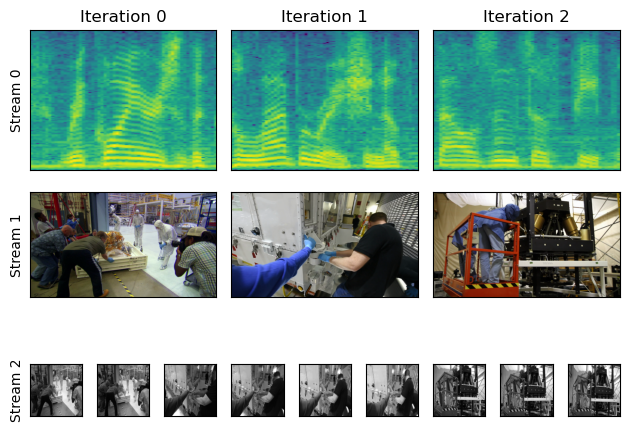

In [28]:
k = 3
fig = plt.figure()
gs = fig.add_gridspec(3, k * n_ite)
for i, waveform in enumerate(waveforms):
    ax = fig.add_subplot(gs[0, k * i : k * (i + 1)])
    ax.specgram(waveform[:, 0], Fs=8000)
    ax.set_yticks([])
    ax.set_xticks([])
    ax.set_title(f"Iteration {i}")
    if i == 0:
        ax.set_ylabel("Stream 0")
for i, vid in enumerate(vids1):
    ax = fig.add_subplot(gs[1, k * i : k * (i + 1)])
    ax.imshow(vid[0].permute(1, 2, 0))  # NCHW->HWC
    ax.set_yticks([])
    ax.set_xticks([])
    if i == 0:
        ax.set_ylabel("Stream 1")
for i, vid in enumerate(vids2):
    for j in range(3):
        ax = fig.add_subplot(gs[2, k * i + j : k * i + j + 1])
        ax.imshow(vid[j].permute(1, 2, 0), cmap="gray")
        ax.set_yticks([])
        ax.set_xticks([])
        if i == 0 and j == 0:
            ax.set_ylabel("Stream 2")
plt.tight_layout()